# Data Aggregation

Need to aggregate data contained in all the pkl files (within the data directory) into one dictionary. Subsequently, the data contained in the one dictionary can be transferred into a pandas DataFrame.

In [1]:
#import libraries
import os
import glob
import pickle
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#change directory to one containing the aggregate_data.py file
os.chdir('../')

In [6]:
#now import aggregate_data.py file
import aggregate_data as ad

### Steps:
1. Get names of all the data files
2. Read in each file one at a time; add data to master data file per platform
3. Put all the data into a pandas DataFrame

In [7]:
# Step 1: getting names of all the data files
os.chdir('./data/')

#creating list with data file names
file_list = [file for file in glob.glob("*.pkl")]

In [8]:
#list of data files
file_list

['all_CachesOpened.pkl',
 'all_DamageDone.pkl',
 'all_DamageTaken.pkl',
 'all_HeadshotsPercentage.pkl',
 'all_KillsPerMin.pkl',
 'all_KioskPurchases.pkl',
 'all_LastStandKills.pkl',
 'all_TimeMoving.pkl',
 'battlenet_Contracts.pkl',
 'battlenet_Deaths.pkl',
 'battlenet_Downs.pkl',
 'battlenet_Kills.pkl',
 'battlenet_Score.pkl',
 'battlenet_ScorePerMinute.pkl',
 'battlenet_TimePlayed.pkl',
 'battlenet_Top10.pkl',
 'battlenet_Wins.pkl',
 'psn_Contracts.pkl',
 'psn_Deaths.pkl',
 'psn_Downs.pkl',
 'psn_Kills.pkl',
 'psn_Score.pkl',
 'psn_ScorePerMinute.pkl',
 'psn_TimePlayed.pkl',
 'psn_Top10.pkl',
 'psn_Wins.pkl',
 'xbl_Contracts.pkl',
 'xbl_Deaths.pkl',
 'xbl_Downs.pkl',
 'xbl_Kills.pkl',
 'xbl_Score.pkl',
 'xbl_ScorePerMinute.pkl',
 'xbl_TimePlayed.pkl',
 'xbl_Top10.pkl',
 'xbl_Wins.pkl']

In [9]:
# Step 2: Read in file at a time, add data to master data file per platform

#initiate main data dictionaries for each platform (ie. psn, xbl, battlenet)
psn_dict = {}
xbl_dict = {}
battlenet_dict = {}

#for each file... 
#note: tqdm simply gives us a status bar as the for loop executes
for file_name in tqdm(file_list):
    
    #extracting platform and feature from the file name (needed later)
    file_platform = file_name.replace('.pkl','').split('_')[0]
    feature = file_name.replace('.pkl','').split('_')[1]
    
    #grab data from file 
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
    
    #need to add player info to appropriate dict based on their platform: 
    
    #for each player in the currently loaded data file...
    for player, stat in data.items():
        
        #get the player's platform
        player_platform = stat['platform']
        
        #add the player to the appropriate dict based on their platform
        if player_platform == 'psn':
            psn_dict = ad.add_player_info(psn_dict, file_platform, feature, player,
                                       stat, player_platform)
        elif player_platform == 'xbl':
            xbl_dict = ad.add_player_info(xbl_dict, file_platform, feature, player,
                           stat, player_platform)
            
        elif player_platform == 'battlenet':
            battlenet_dict = ad.add_player_info(battlenet_dict, file_platform, feature, player,
               stat, player_platform)
            
        else:
            print(f"For player {player} in file {file_name}, {player_platform} is an invalid platform.")
            

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:32<00:00,  1.09it/s]


At this point the dictionaries contain all the player data.
            
Step 3: Next, need to take the data from the dictionaries and put them into pandas dataframes. Then concat the 3 pd dfs.

In [11]:
#NOTE: this cell takes long to process

# 1. Data from dict to pd Df

psn_df = pd.DataFrame.from_dict(psn_dict).T
print('psn done')

xbl_df = pd.DataFrame.from_dict(xbl_dict).T
print('xbl done')

battlenet_df = pd.DataFrame.from_dict(battlenet_dict).T
print('battlenet done')

psn done
xbl done
battlenet done


In [17]:
# 2. Then concatenate the 3 dfs

df = pd.concat([psn_df, xbl_df, battlenet_df], ignore_index = True)

In [18]:
#check sample sizes are the same size
len(psn_df) + len(xbl_df) + len(battlenet_df) == len(df) 

True

In [21]:
#we can free up some space by removing the dataframes that make up df
del psn_df, xbl_df, battlenet_df

### Data in final pd DataFrame

Now let's do some preliminary data exploration.

In [23]:
#size of total data
df.shape

(2348709, 27)

In [24]:
df.head()

,platform,CachesOpened,DamageTaken,HeadshotsPercentage,TimeMoving,DamageDone,KioskPurchases,KillsPerMin,Contracts,Contracts_mp,...,Score_mp,ScorePerMinute,ScorePerMinute_mp,Wins,Wins_mp,LastStandKills,TimePlayed,TimePlayed_mp,Top10,Top10_mp
0,psn,23.7,745,63.3%,87.2%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,psn,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,psn,18,561,33.3%,86.5%,925,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,psn,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,psn,17,769,NaN,89.2%,1305,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#let's see missing values
df.isna().sum() / len(df)

platform               0.000000
CachesOpened           0.947730
DamageTaken            0.923759
HeadshotsPercentage    0.956281
TimeMoving             0.954720
DamageDone             0.914198
KioskPurchases         0.988572
KillsPerMin            0.918829
Contracts              0.359480
Contracts_mp           0.359480
Deaths                 0.303422
Deaths_mp              0.303422
Downs                  0.296683
Downs_mp               0.296683
Kills                  0.285506
Kills_mp               0.285506
Score                  0.144259
Score_mp               0.144259
ScorePerMinute         0.343927
ScorePerMinute_mp      0.343927
Wins                   0.452004
Wins_mp                0.452004
LastStandKills         0.970831
TimePlayed             0.306797
TimePlayed_mp          0.306797
Top10                  0.658281
Top10_mp               0.658281
dtype: float64

Very high percentage of NaNs throughout the data. Let's see how many players have no nans.

In [38]:
len(df[df.notnull().all(axis=1)])

466

ONLY 466 players have no NaNs at all and we have data for over 2 million players!

We will need to impute many values to save as much data as possible.

In [40]:
#let's see what's special about players with non nulls
no_null = df[df.notnull().all(axis=1)]
no_null

,platform,CachesOpened,DamageTaken,HeadshotsPercentage,TimeMoving,DamageDone,KioskPurchases,KillsPerMin,Contracts,Contracts_mp,...,Score_mp,ScorePerMinute,ScorePerMinute_mp,Wins,Wins_mp,LastStandKills,TimePlayed,TimePlayed_mp,Top10,Top10_mp
124,psn,10.2,645,21%,86.3%,3148,4.21,0.43,"2,005",739,...,719,499.12,719,92,719,5.5,9d 13h 21m,739,352,739
304,psn,9.33,478,22.1%,89.5%,2548,4.11,0.28,647,474,...,474,322.50,474,26,438,4.22,6d 05h 34m,535,187,535
354,psn,9.18,514,20.5%,90.6%,2299,3.15,0.27,"1,735",1079,...,1062,326.21,1062,224,1014,3.76,16d 21h 51m,1079,688,1079
750,psn,8.53,586,30.6%,87.7%,1747,2.73,0.19,"2,705",1409,...,1409,275.04,1409,107,1409,2.53,18d 17h 40m,1409,642,1409
1651,psn,7.9,504,20.7%,86.6%,1934,2.93,0.22,"1,443",795,...,795,288.36,795,76,795,2.84,15d 15h 12m,1165,562,1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970448,battlenet,4.74,12522300,21.6%,88.6%,2971,2.73,0.33,"1,124",629,...,629,320.59,629,103,629,4.22,10d 08h 05m,629,420,629
1970555,battlenet,4.74,18593400,23.5%,88.1%,4064,3.23,0.59,"2,052",1051,...,1039,502.75,1039,231,976,5.74,16d 16h 26m,1032,741,1127
1970680,battlenet,4.73,593,20.1%,86.8%,1973,3.16,0.26,"2,261",1167,...,1086,310.62,1104,33,1034,3.55,12d 06h 56m,1073,309,1213
1970732,battlenet,4.73,532,21.4%,86.6%,1954,2.78,0.23,"2,490",1199,...,1150,284.71,1150,78,940,3.2,17d 11h 12m,1131,719,1298


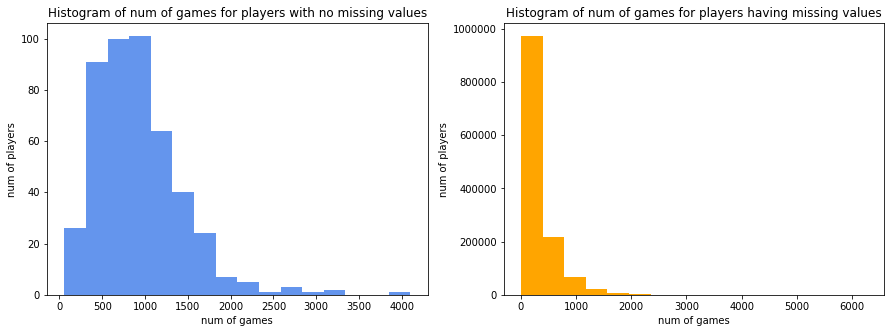

In [66]:
#my first guess is these players have a lot of games played
#compare to distribution of total data

plt.subplots(1,2, figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(no_null['Wins_mp'], bins=16, color='cornflowerblue')
plt.title('Histogram of num of games for players with no missing values')
plt.xlabel('num of games')
plt.ylabel('num of players')

plt.subplot(1,2,2)
plt.hist(df['Wins_mp'], bins=16, color='orange')
plt.title('Histogram of num of games for players having missing values')
plt.xlabel('num of games')
plt.ylabel('num of players')

plt.show()

We can see that there are many more fresh players (ie. players with fewer games) in the total dataset compared to players with no missing values. This indicates the websites that collect player data may not get all the data for newer players. 

**Some more ideas to identify sources of missing values:**
- check missing values by platform
- check missing values by website (ie. features scraped from the different website)
- check the amount of missing values players have (ie. just 2 features missing vs almost all the features missing for a player)